# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

**change the network topology**

In [2]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

inputs = keras.Input(shape=(784,))
l1 = layers.Dense(128, activation="relu")(inputs)
l2 = layers.Dense(64, activation="relu")(l1)
l3 = layers.Dense(32, activation="relu")(l2)
l4 = layers.Dense(64, activation="relu")(l3)
l5 = layers.Dense(128, activation="relu")(l4)
outputs = layers.Dense(784, activation='sigmoid')(l5)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               1011

**change the loss-function to compare input and output bold text**

In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [4]:
batch_size = 256
history = model.fit(x_train, x_train, batch_size=batch_size, epochs=100, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2481 - val_loss: 0.1730
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1525 - val_loss: 0.1380
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1319 - val_loss: 0.1239
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1220 - val_loss: 0.1174
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1167 - val_loss: 0.1131
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1127 - val_loss: 0.1094
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1073
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1075 - val_loss: 0.1050
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1030
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_lo

In [0]:
predicted = model.predict(x_test)

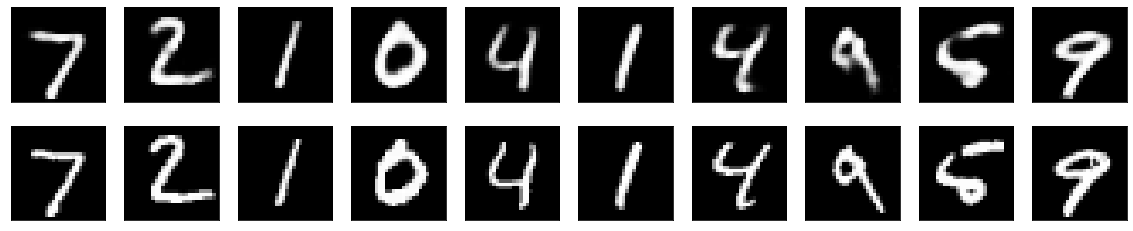

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n,i+1+n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
import pandas as pd
mse = np.mean(np.power(x_test - predicted, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df['reconstruction_error'].describe()

count    10000.000000
mean         0.007263
std          0.004568
min          0.000353
25%          0.004108
50%          0.006388
75%          0.009457
max          0.037211
Name: reconstruction_error, dtype: float64

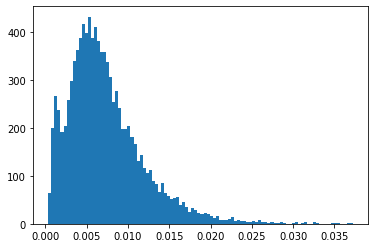

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(error_df.reconstruction_error.values, bins=100)

In [0]:
mask = (mse > 0.020)
outliers = x_test[mask]
outliers_pred = predicted[mask]


In [12]:
outliers.shape

(173, 784)

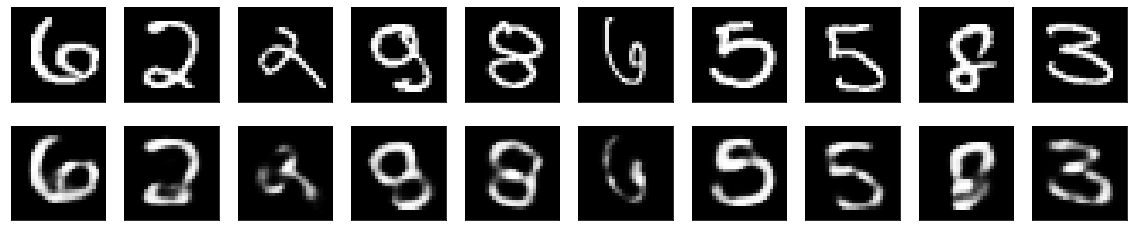

In [13]:
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i+ 1)
    plt.imshow(outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n,i+1+n)
    plt.imshow(outliers_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

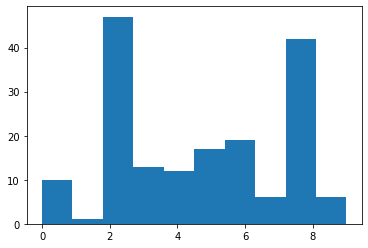

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(y_test[mask], bins=10)